## Observations and Insights 

1. Capomulin and Ramicane seem to be two of the more effective drugs in shrinking tumor volume according to the box plot of final tumor volumes. 
2. In the case of mice treated with Capomulin,time on the drug regimen seems to negatively correlate with tumor size -- i.e. the longer a mouse is on the drug, the smaller its tumors become. 
3. In the case of mice treated with Capomulin, mouse weight seems to positively affect tumor volume -- i.e. the larger a mouse is, the more likely it is to have a larger tumor.



In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
combined_df.head(5)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [3]:
# Checking the number of mice.
combined_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [4]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = combined_df[combined_df.duplicated(['Mouse ID', 'Timepoint'], keep=False)]

duplicate_mice

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

pd.set_option("display.max_rows", None)

clean_df = combined_df[combined_df["Mouse ID"].str.contains("g989")==False]
clean_df[clean_df['Drug Regimen'] == "Infubinol"][['Tumor Volume (mm3)', 'Timepoint']]

clean_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
n = len(pd.unique(clean_df['Mouse ID']))

n


248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen


table_mean = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

table_mean


Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [8]:
#Median
table_med = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
table_med

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [9]:
#SEM
table_SEM = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
table_SEM

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [10]:
#Variance
table_var = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
table_var

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [11]:
#Standard Deviation
table_std = clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
table_std

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [12]:
#Summary Table
stats_merge1 = pd.merge(table_mean, table_med,on="Drug Regimen")
stats_merge1.columns = ['Mean', 'Median']



stats_merge1


,Mean,Median
Drug Regimen,,
Capomulin,40.675741,41.557809
Ceftamin,52.591172,51.776157
Infubinol,52.884795,51.820584
Ketapril,55.235638,53.698743
Naftisol,54.331565,52.509285
Placebo,54.033581,52.288934
Propriva,52.320930,50.446266
Ramicane,40.216745,40.673236
Stelasyn,54.233149,52.431737


In [13]:
stats_merge2 = pd.merge(stats_merge1, table_SEM,on="Drug Regimen")
stats_merge2.columns = ['Mean', 'Median', 'SEM']



stats_merge2

,Mean,Median,SEM
Drug Regimen,,,
Capomulin,40.675741,41.557809,0.329346
Ceftamin,52.591172,51.776157,0.469821
Infubinol,52.884795,51.820584,0.492236
Ketapril,55.235638,53.698743,0.603860
Naftisol,54.331565,52.509285,0.596466
Placebo,54.033581,52.288934,0.581331
Propriva,52.320930,50.446266,0.544332
Ramicane,40.216745,40.673236,0.320955
Stelasyn,54.233149,52.431737,0.573111


In [14]:
stats_merge3 = pd.merge(stats_merge2, table_var,on="Drug Regimen")
stats_merge3.columns = ['Mean', 'Median', 'SEM', "Variance"]



stats_merge3

,Mean,Median,SEM,Variance
Drug Regimen,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764
Ceftamin,52.591172,51.776157,0.469821,39.290177
Infubinol,52.884795,51.820584,0.492236,43.128684
Ketapril,55.235638,53.698743,0.603860,68.553577
Naftisol,54.331565,52.509285,0.596466,66.173479
Placebo,54.033581,52.288934,0.581331,61.168083
Propriva,52.320930,50.446266,0.544332,43.852013
Ramicane,40.216745,40.673236,0.320955,23.486704
Stelasyn,54.233149,52.431737,0.573111,59.450562


In [15]:
#Final Summary Table

stats_mergefinal = pd.merge(stats_merge3, table_std,on="Drug Regimen")
stats_mergefinal.columns = ['Mean', 'Median', 'SEM', "Variance", "Standard Deviation"]



stats_mergefinal

,Mean,Median,SEM,Variance,Standard Deviation
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


In [16]:
# Using the aggregation method, produce the same summary statistics in a single line
clean_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'sem', 'var', 'std'])

,mean,median,sem,var,std
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,24.947764,4.994774
Ceftamin,52.591172,51.776157,0.469821,39.290177,6.268188
Infubinol,52.884795,51.820584,0.492236,43.128684,6.567243
Ketapril,55.235638,53.698743,0.603860,68.553577,8.279709
Naftisol,54.331565,52.509285,0.596466,66.173479,8.134708
Placebo,54.033581,52.288934,0.581331,61.168083,7.821003
Propriva,52.320930,50.446266,0.544332,43.852013,6.622085
Ramicane,40.216745,40.673236,0.320955,23.486704,4.846308
Stelasyn,54.233149,52.431737,0.573111,59.450562,7.710419


## Bar and Pie Charts

In [17]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.

#Get unique mice

mice_drug1 = clean_df.groupby('Drug Regimen').count().reset_index()
mice_drug = mice_drug1[['Drug Regimen', 'Mouse ID']]
mice_drug = mice_drug.set_index('Drug Regimen')

mice_drug

,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


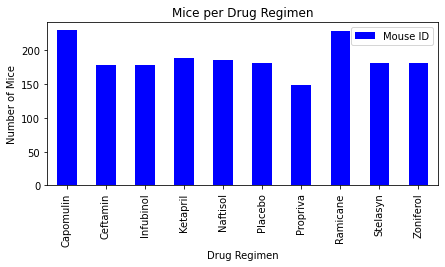

<Figure size 432x288 with 0 Axes>

In [18]:

mice_drug.plot(kind="bar", color='b', figsize=(7,3))
plt.title("Mice per Drug Regimen")
plt.ylabel("Number of Mice")

plt.show()
plt.tight_layout()


In [19]:

# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.
mice_drug2 = clean_df.groupby('Drug Regimen').count().reset_index()
mice_drug_2 = mice_drug2[['Drug Regimen', 'Mouse ID']]
mice_drug_2 = mice_drug_2.set_index('Drug Regimen')

mice_drug_2



,Mouse ID
Drug Regimen,
Capomulin,230
Ceftamin,178
Infubinol,178
Ketapril,188
Naftisol,186
Placebo,181
Propriva,148
Ramicane,228
Stelasyn,181


In [20]:
x_axis = np.arange(len(mice_drug))
tick_locations = [value for value in x_axis]
x_axis



array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

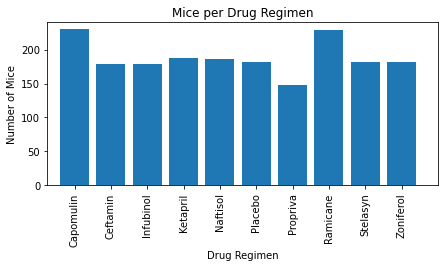

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(7,3))
plt.bar(x_axis,mice_drug_2["Mouse ID"])

plt.xticks(tick_locations, mice_drug2["Drug Regimen"], rotation = "vertical")

plt.title("Mice per Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")

plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(mice_drug["Mouse ID"])+ 10)

plt.show()
plt.tight_layout()

In [22]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
#First need to get number of individual mice per sex

mice_gender = clean_df.drop_duplicates(subset='Mouse ID', keep= 'first')
gender_count = mice_gender['Sex'].value_counts()

gender_count


Male      125
Female    123
Name: Sex, dtype: int64

In [23]:
gender_count_df = pd.DataFrame({
    "Mice per sex": gender_count
})

gender_count_df

,Mice per sex
Male,125
Female,123


<AxesSubplot:ylabel='Mice per sex'>

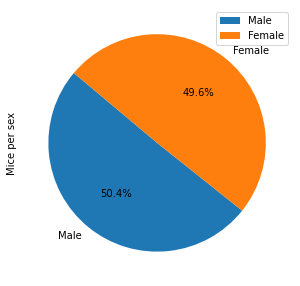

In [24]:
#pandas pie plot

gender_count_df.plot.pie(y='Mice per sex', startangle=140,figsize=(5,5), autopct="%1.1f%%")

(-1.1092527659968812,
 1.1222566193373384,
 -1.109449931456455,
 1.1211462801337193)

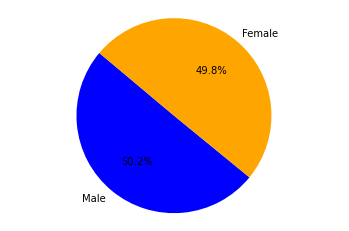

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

labels = ["Male", "Female"]
sizes = [125, 124]
colors = ["blue", "orange"]

plt.pie(sizes, labels = labels, colors = colors, autopct="%1.1f%%",startangle=140)
plt.axis("equal")



## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_df.groupby('Mouse ID').max()
four_drugs = max_tumor.loc[(max_tumor["Drug Regimen"] == "Capomulin") | (max_tumor["Drug Regimen"] == "Ramicane") 
                           | (max_tumor["Drug Regimen"] == "Infubinol") | (max_tumor["Drug Regimen"] == "Ceftamin"), :]

four_drugs.head(5)

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0


In [27]:
#only display drug, timepoint, and tumor volume:

drug_df = four_drugs[['Drug Regimen', 'Timepoint', 'Tumor Volume (mm3)']]

#Sort columns
drug_df['Drug Regimen'] = pd.Categorical(drug_df['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])

sorted_drug_df = drug_df.sort_values("Drug Regimen")

sorted_drug_df.head(10)


<ipython-input-27-f6ebb3ddd531>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_df['Drug Regimen'] = pd.Categorical(drug_df['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


,Drug Regimen,Timepoint,Tumor Volume (mm3)
Mouse ID,,,
l897,Capomulin,45,46.154737
g288,Capomulin,45,46.304003
g316,Capomulin,45,46.809225
i557,Capomulin,45,47.685963
i738,Capomulin,45,45.595685
j119,Capomulin,45,48.158209
j246,Capomulin,35,46.408361
t565,Capomulin,45,46.749006
s710,Capomulin,45,45.000000


In [28]:
# Put treatments into a list for for loop (and later for plot labels)
treatment_list = []

for regimen in sorted_drug_df["Drug Regimen"]:
    if regimen not in treatment_list:
        treatment_list.append(regimen)
        
treatment_list
    

['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

In [29]:
# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_list = []

drug_plot = max_tumor.loc[(max_tumor["Drug Regimen"] == "Capomulin") |(max_tumor["Drug Regimen"] == "Ramicane") | 
                          (max_tumor["Drug Regimen"] == "Infubinol") | (max_tumor["Drug Regimen"] == "Ceftamin"), :]

drug_plot.head()

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
a203,Infubinol,Female,20,23,45,67.973419,2
a251,Infubinol,Female,21,25,45,65.525743,1
a275,Ceftamin,Female,20,28,45,62.999356,3
a411,Ramicane,Male,3,22,45,45.466677,1
a444,Ramicane,Female,10,25,45,45.000000,0


In [30]:
#sort by drug

drug_plot['Drug Regimen'] = pd.Categorical(drug_plot['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
sorted_drug_plot = drug_plot.sort_values("Drug Regimen")

sorted_drug_plot.head()

<ipython-input-30-f2812e93afa0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  drug_plot['Drug Regimen'] = pd.Categorical(drug_plot['Drug Regimen'], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])


,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,
l897,Capomulin,Male,17,19,45,46.154737,1
g288,Capomulin,Male,3,19,45,46.304003,1
g316,Capomulin,Female,22,22,45,46.809225,2
i557,Capomulin,Female,1,24,45,47.685963,1
i738,Capomulin,Female,23,20,45,45.595685,2


In [31]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

#IQR

quartiles = sorted_drug_plot['Tumor Volume (mm3)'].quantile([.25, .5, .75])
q1 = quartiles[0.25]
q3 = quartiles[0.75]
IQR = q3 - q1
lb = q1 - (1.5*IQR)
ub = q3 + (1.5*IQR)

print(lb, ub)


23.87921808625001 81.56088795624999


In [34]:
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds

mouse_outlier = sorted_drug_plot.loc[(drug_plot['Tumor Volume (mm3)'] < lb) | (drug_plot['Tumor Volume (mm3)'] > ub)]


mouse_outlier

,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Mouse ID,,,,,,,


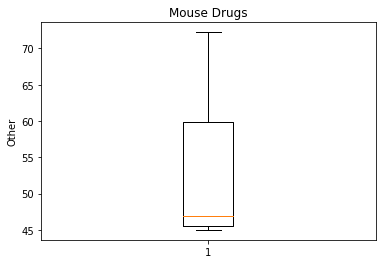

In [45]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
mice = sorted_drug_df['Tumor Volume (mm3)']

fig1, ax1 = plt.subplots()
ax1.set_title('Mouse Drugs')
ax1.set_ylabel('Other')
ax1.boxplot(mice)
plt.show()

## Line and Scatter Plots

In [ ]:
#filter df to only show mice treated with Capomulin

capo_df = clean_df.loc[clean_df['Drug Regimen'] == "Capomulin"]

capo_df.head()

In [ ]:
#filter to a single mouse

one_mouse = capo_df['Mouse ID'] == 's185'

final_one_mouse = capo_df[one_mouse]

final_one_mouse

In [ ]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
#need to only show one mouse

df = pd.DataFrame(final_one_mouse, columns=['Tumor Volume (mm3)', 'Timepoint'])
df.plot(x = 'Timepoint', y = 'Tumor Volume (mm3)', kind = 'line')
plt.show()

In [ ]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

#need to get the average tumor volume per mouse

mean_capo = capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
mean_capo




In [ ]:
weight_capo = capo_df.groupby('Mouse ID')['Weight (g)'].mean()
weight_capo

In [ ]:
#merge the two 

mouse_merge = pd.merge(mean_capo, weight_capo, on="Mouse ID")
mouse_merge.columns = ['Tum Vol', 'Weight']

mouse_merge.head()

In [ ]:
plt.scatter(mean_capo, weight_capo, marker="o", facecolors="red", edgecolors="black")
plt.title("Average Mouse Weight/Tumor Volume")
plt.xlabel("Mean Tumor Vol")
plt.ylabel("Mean Mouse Weight")


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen


#calculate correlation coefficient 

av_tumor = mouse_merge.iloc[:,0]
av_weight = mouse_merge.iloc[:,1]

print(f"The correlation coefficient between average tumor size and average mouse weight is {round(st.pearsonr(av_tumor,av_weight)[0],2)}")

In [ ]:

#calculate linear regression model
mouse_slope, mouse_int, mouse_r, mouse_p, mouse_std_err = st.linregress(mean_capo, weight_capo)

mouse_fit = mouse_slope * mean_capo + mouse_int



In [ ]:
#print plot with regression line

plt.scatter(mean_capo, weight_capo, marker="o", facecolors="red", edgecolors="black")
plt.plot(mean_capo,mouse_fit,"--")
plt.title("Average Mouse Weight/Tumor Volume")
plt.xlabel("Mean Tumor Vol")
plt.ylabel("Mean Mouse Weight")